In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

sns.set_theme(style="darkgrid")

In [33]:
dir = r"/home/bruno/Documentos/mba_usp/arvores_redes_ensemble_models_2/Arquivos e scripts 27.06.23 - Atualizado/tips.csv"
df = pd.read_csv(dir).drop(columns="Unnamed: 0")

df_copy = df.copy()

df_copy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
df_copy["pct_tip"] = df_copy.tip / (df_copy.total_bill - df_copy.tip)
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


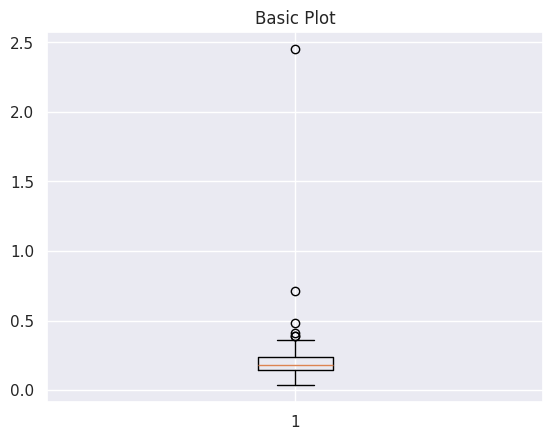

In [35]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_copy.pct_tip);

Remoção de outliers

Utilizando apenas valores de pct_tip menores que 1

In [38]:
df_copy = df_copy[df_copy["pct_tip"] < 1]

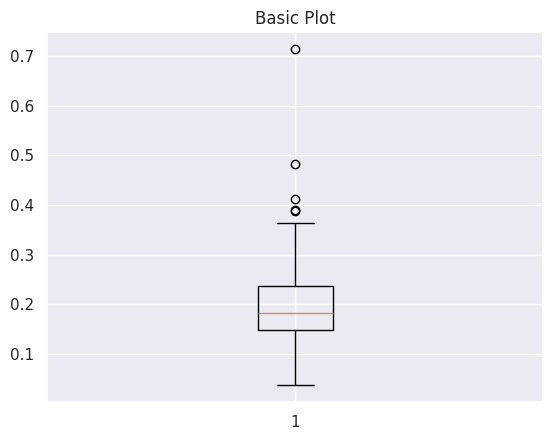

In [41]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_copy.pct_tip);

In [42]:
def count_plot(df, eixo_x):
    return sns.countplot(df, x=eixo_x)

def bar_plot(df, eixo_x, eixo_y):
    # Criar um gráfico de barras com intervalo de confiança
    ax = sns.barplot(data=df, x=eixo_x, y=eixo_y,  errorbar="sd")
        
    return sns.pointplot(data=df, x=eixo_x, y=eixo_y, color="black", errorbar=None, estimator=lambda x: x.mean(), ax=ax)

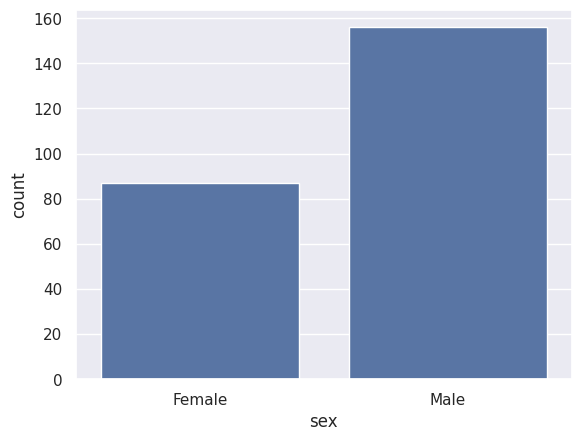

In [43]:
count_plot(df_copy, "sex");

De acordo com o plot acima, a população masculina é maior que a feminina

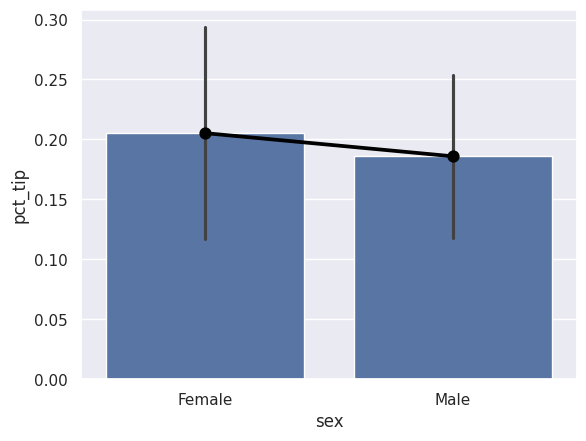

In [44]:
bar_plot(df_copy, "sex", "pct_tip");

No gŕafico acima a porcentagem de gorjeta entre a população feminina é um pouco maior que a masculina.

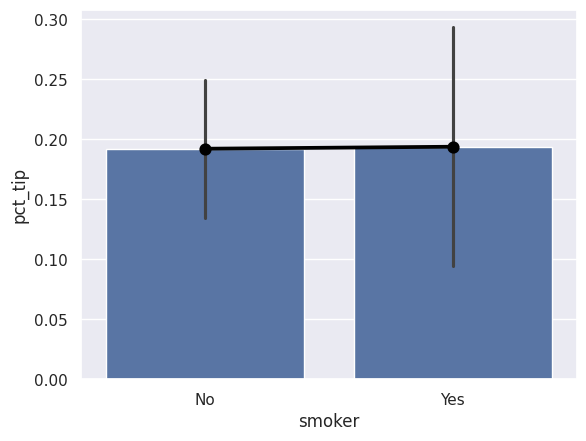

In [45]:
bar_plot(df_copy, "smoker", "pct_tip");

No gŕafico acima a porcentagem de gorjeta entre a fumantes e não fumantes é relativamente igual.

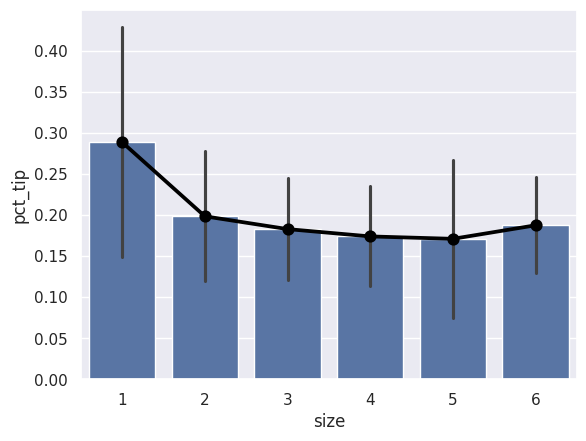

In [46]:
bar_plot(df_copy, "size", "pct_tip");

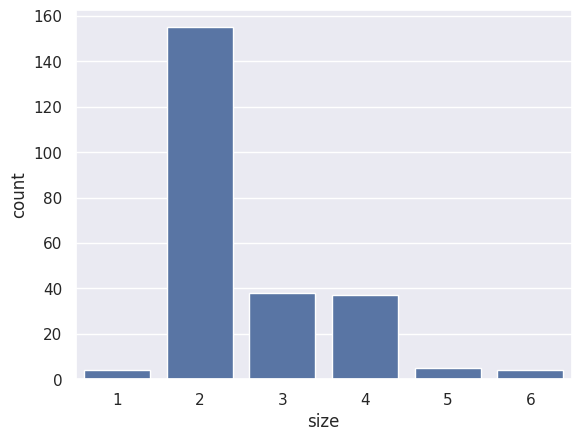

In [47]:
count_plot(df_copy, "size");

No gráfico 5 podemos verificar que a mesa que possui lugar para 1 pessoa (size = 1) tem a maior porcentagem de dar gorjeta, porém, realizando o plot com base na frequencia das mesas (grafico 6), a quantidade de mesas com lugar para 1 pessoa é extremamente baixo.

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
